# Israel-Palestine Warn Sentimen Analysis

### 1. Data Exploration & Cleaning

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
# import data
df = pd.read_csv('example.csv')
# example = df.iloc[:50000, :]
# example.to_csv('example.csv', index=False)

In [6]:
df.sample(5)

comment_id  score                                          self_text  \
5816     k9s0e1t      1  I never said new and unheared of, I said that ...   
21876    k9mlyjy     25  British politicians let 3 Million(lowest estim...   
7879     k9rebal      2                                     That’s a shame   
20593    k9n2j6f      1  The Arabs are the only ones who lose wars they...   
46120    k9edosj     -8  You can tell a lot about a person based on how...   

             subreddit               created_time  
5816   IsraelPalestine  2023-11-18 16:11:41+00:00  
21876        Palestine  2023-11-17 12:14:09+00:00  
7879         worldnews  2023-11-18 13:06:55+00:00  
20593  IsraelPalestine  2023-11-17 14:37:50+00:00  
46120  IsraelPalestine  2023-11-15 19:36:57+00:00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    50000 non-null  object
 1   score         50000 non-null  int64 
 2   self_text     50000 non-null  object
 3   subreddit     50000 non-null  object
 4   created_time  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [8]:
for i in range(10):
   print(df.self_text[i])

Israel is like the most ethnically diverse country in the Middle East what are you talking about 💀
The only people starving them is Hamas who keeps hoarding all the aid food and shooting civilians who try to take it.
The casualty numbers for the pakistan-afghanistan conflict is actually nuts.
that's like the most notable thing about the video lmaoo. Nice one
'You thinking what I'm thinking?"

"Aim for the bushes"
Yup, still operating. The IDF has delivered fuel and meals to the hospital while working with staff on evacuating patients to safer places for care. While I’d presume the war hasn’t made things easier for the hospital, it is clear Hamas was already diminishing its capacity and capabilities by using it as a base. In addition to hoarding scarce resources, Hamas repurposed space in the hospital for their needs; for example a large store of ammunition and grenades were found hidden behind an MRI machine, which prevents the machine from operating at all.
\&gt;denies it's a dick mea

In [9]:
# unzip wordnet folder
import zipfile
import os

zip_file_path = 'C:/Users/danar/AppData/Roaming/nltk_data/corpora/wordnet.zip'
destination_directory = 'C:/Users/danar/AppData/Roaming/nltk_data/corpora/'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
   # Unzip the entire archive if the specific file doesn't exist
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(destination_directory)
   print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
   print(f"File {file_to_check} already exists. No need to unzip the archive.")

File index.adv already exists. No need to unzip the archive.


In [10]:
# Initialize the lemmatizer and stopwords

# download folder 'corpora' from nltk_data jika belum ada
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
   # Check if the input is not a string (e.g., if it's a float)
   if not isinstance(text, str):
      return ''

   # Remove URLs
   text = re.sub(r'http\S+', '', str(text))

   # Remove HTML tags
   soup = BeautifulSoup(text, 'html.parser')
   text = soup.get_text()

   # Remove special characters and lowercase the text
   text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

   # Tokenization
   tokens = word_tokenize(text)

   # Lemmatization and removing stopwords
   tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

   # Join the tokens back into a sentence
   cleaned_text = ' '.join(tokens)

   return cleaned_text

# Example usage on 'self_text' column of your DataFrame
df['clean_text'] = df['self_text'].apply(clean_text)

C:\Users\danar\AppData\Local\Temp\ipykernel_20188\2118153280.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [11]:
for i in range(10):
   print(df.clean_text[i])

israel like ethnically diverse country middle east talking
people starving hamas keep hoarding aid food shooting civilian try take
casualty number pakistanafghanistan conflict actually nut
thats like notable thing video lmaoo nice one
thinking im thinking aim bush
yup still operating idf delivered fuel meal hospital working staff evacuating patient safer place care id presume war hasnt made thing easier hospital clear hamas already diminishing capacity capability using base addition hoarding scarce resource hamas repurposed space hospital need example large store ammunition grenade found hidden behind mri machine prevents machine operating
denies dick measuring contest describes dick measuring contest
thats assume im definitely adequately informed topic first paragraph puke puked couldnt respond argument storm comment section load copied text create delusional victory make hard respond everything said copied argument simple dont long read theyre hard understand certainly wont take much

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    50000 non-null  object
 1   score         50000 non-null  int64 
 2   self_text     50000 non-null  object
 3   subreddit     50000 non-null  object
 4   created_time  50000 non-null  object
 5   clean_text    50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


### 2. Sentimen Analysis Using VADER

In [13]:
# nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
   "Compound": [],
   "Positive": [],
   "Negative": [],
   "Neutral": []
}

# Generate sentiment scores for Reddit comments
for comment in df['clean_text']:
   compound = analyzer.polarity_scores(comment)["compound"]
   pos = analyzer.polarity_scores(comment)["pos"]
   neu = analyzer.polarity_scores(comment)["neu"]
   neg = analyzer.polarity_scores(comment)["neg"]
   
   scores["Compound"].append(compound)
   scores["Positive"].append(pos)
   scores["Negative"].append(neg)
   scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([df, sentiments_score], axis=1)

In [14]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  
0     0.000    0.737  
1     0.219    0.781  
2     0.570    0.300  
3     0.000    0.531  
4     0.000    1.000

In [15]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
   (df['Compound'] <= -0.5),
   (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
   (df['Compound'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)

In [16]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  Category  
0     0.000    0.737   Neutral  
1     0.219    0.781   Neutral  
2     0.570    0.300  Negative  
3     0.000    0.531  Positive  
4     0.000    1.000   Neutral

# Exploratory Data Analysis

In [17]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = df.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

counts_df = counts_df.drop(index='0')

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative   14281      28.562
Neutral    27868      55.736
Positive    7849      15.698


In [18]:
counts_df

Counts  Percentage
Category                    
Negative   14281      28.562
Neutral    27868      55.736
Positive    7849      15.698

In [19]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index, 
            labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
            title='Distribution of Sentiment Categories in Comments',
            hole=0.3, 
            color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to dark grey
fig.update_layout(paper_bgcolor='darkgrey')


# Show the Plotly Pie Chart
fig.show()

In [20]:
# POSITIVE SCORE COMMENTS

# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_pos_comments = df.nlargest(n=50, columns=['Compound'])["clean_text"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 50 comments with the most positive sentiment.


print(top_50_pos_comments)

# print top 5
# for com in top_50_pos_comments:
#     print(com, "\n")

34409    freedom fighter dont rape freedom fighter dont...
3923     think key historical contemporary factor shape...
10705    escalating violence death expansion colonialse...
20202    hey man hear every muslim used friend supporte...
35901    track history leading seem one vision kill eve...
36460    dont think scared think time positivity hope p...
429      please order u productive discussion able subs...
21886    mean earth walkable underground communication ...
41602    appreciate post said hamaspalestinians right t...
9953     zahir mushein military leader plo member execu...
8855     hadith popular hadith verse quoted apologist d...
49266    culture criterion indigenous right state cultu...
44381    agree peace 2state solution oslo iii agreement...
28429    throughout history weve seem thag humanity alw...
3653     thats neat part cant everything already arrang...
48754    look like havent read enough history conflict ...
28164    there fairly large percentage would pro israel.

In [21]:
# NEGATIVE SCORE COMMENTS

# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_neg_comments = df.nsmallest(n=50, columns=['Compound'])["clean_text"]

print(top_50_neg_comments)

## print top 5
# for com in top_50_neg_comments:
#     print(com, "\n")

22537    israel bomb hamas target gaza recklessly endan...
11786    read actual definition kneejerk defense indisc...
29948    first screw saudi arabia brutality citezens wa...
2303     obvious dont know anything islam bible thousan...
9811     amount socalled muslim terrorism low negated s...
31560    alot difference one notably one side intention...
6727     must expert tonn language 3 language english n...
12757    see thats problem jewish people online like im...
16091    like far back searching recall great outrage c...
38057    50 israel lie 5 week compiled propandco 40 dea...
38060    50 israel lie 5 week compiled propandco 40 dea...
44299    50 israel lie 5 week 40 dead baby baked baby b...
19586    read comment mine actually let rewind bit even...
1204     idf released first footage elite commando brig...
10314    mate thats problem privileged european online ...
38529    aim intent qualifying factor case determining ...
49267    terrorist definition terrorist terrst noun per.

In [22]:
# COMMENTS WITH HIGH UPVOTES

# Sort the DataFrame by 'score' in descending order and select unique 'clean_text' values
top_50_high_score_comments = df.sort_values('score', ascending=False)['clean_text'].drop_duplicates().head(50)

# This line sorts the DataFrame by 'score' in descending order, 
# selects unique 'clean_text' values, and retrieves the top 50 comments 
# with the highest scores.

print(top_50_high_score_comments)

# # print top 5
# for com in top_50_high_score_comments:
#     print(com, "\n")

45491                                  scheduling conflict
45051    specifically ohioclass cruise missile submarin...
41822            damn woman specific rape torture scenario
12798    take special kind im used impunity film throwi...
34396    last rhetorical question part many side failin...
45474    mohanad hage ali expert hezbollah carnegie mid...
34664    thr main point president joe biden said wednes...
21376    man holding pen paper gun fight finish brake e...
16913            wonder could caused stress poor man heart
34294                        american would lose shit sure
42938    post reddit earlier al jazeera filming hospita...
42704    like fingerpointing cry karen cat meme video x...
33640    dont even need speak hypothetically high schoo...
11333    think possible support israel foreign policy s...
43122                           motherfucker thought rambo
48541               settler first place ongoing issue year
20907    apparently saw tuesday thursday saturday run m.

In [23]:
# TOP COMMENTS WITH LOW UPVOTES

top_50_low_score_comments = df.sort_values('score', ascending=True)['clean_text'].drop_duplicates().head(50)
print(top_50_low_score_comments)

33633    israeli commit violence arrested palestinian c...
21802     precision bomb every block result carpet bombing
5953     okay u soldier literally one world use sight p...
31951    thing supposed destroyed russian false flag at...
4983     picture show like one person backpack worth we...
15248    hamas need let poor people peace release hosta...
7903     video seem show police misconduct seem show ci...
48343                                   isreal isnt victim
12052    thats negotiation work one side make demand si...
21340    poster red paint brutality violence incredibly...
21999    people making sarcastic comment postsyou reali...
48494                    oh shit rocket diesel powered wow
7841     im sure reason cop come guy house seems reason...
13904    wow genocidal scum good luck ideology enemy pr...
21845    pro palestine pro hamas entirely different thi...
31119                                                     
45877    also hard israel helped found group given poli.

C:\Users\danar\AppData\Local\Temp\ipykernel_20188\1496726838.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\danar\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\danar\AppData\Local\Temp\ipykernel_20188\1496726838.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level 

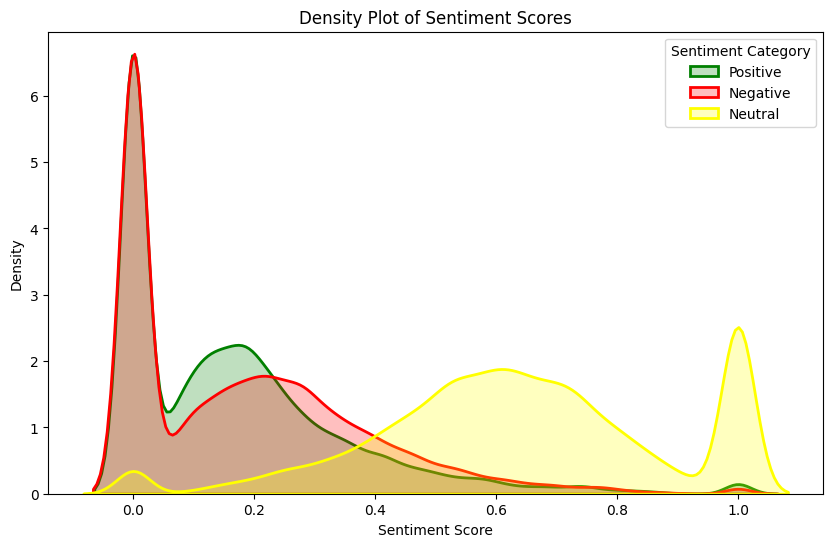

In [24]:
# Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
   sns.distplot(df[category], hist=False, kde=True,
               bins=int(180/5), color=color,
               hist_kws={'edgecolor': 'black'},
               kde_kws={'shade': True, 'linewidth': 2}, label=category)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()

C:\Users\danar\AppData\Local\Temp\ipykernel_20188\3205568877.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\danar\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Compound', ylabel='Density'>

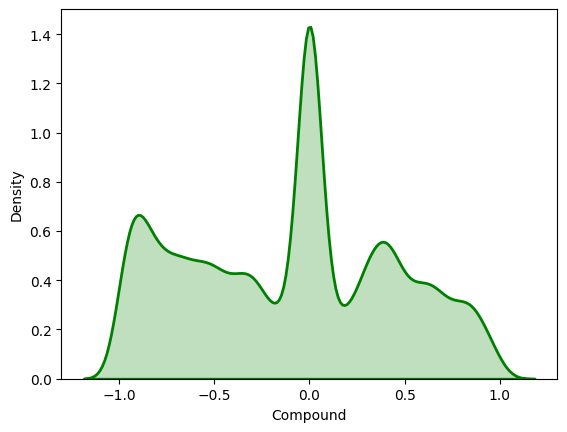

In [25]:
# Visualization of the Sentiment Scores

sns.distplot(df["Compound"], hist=False, kde=True, 
            bins=int(180/5), color = 'green', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'shade': True,'linewidth': 2})

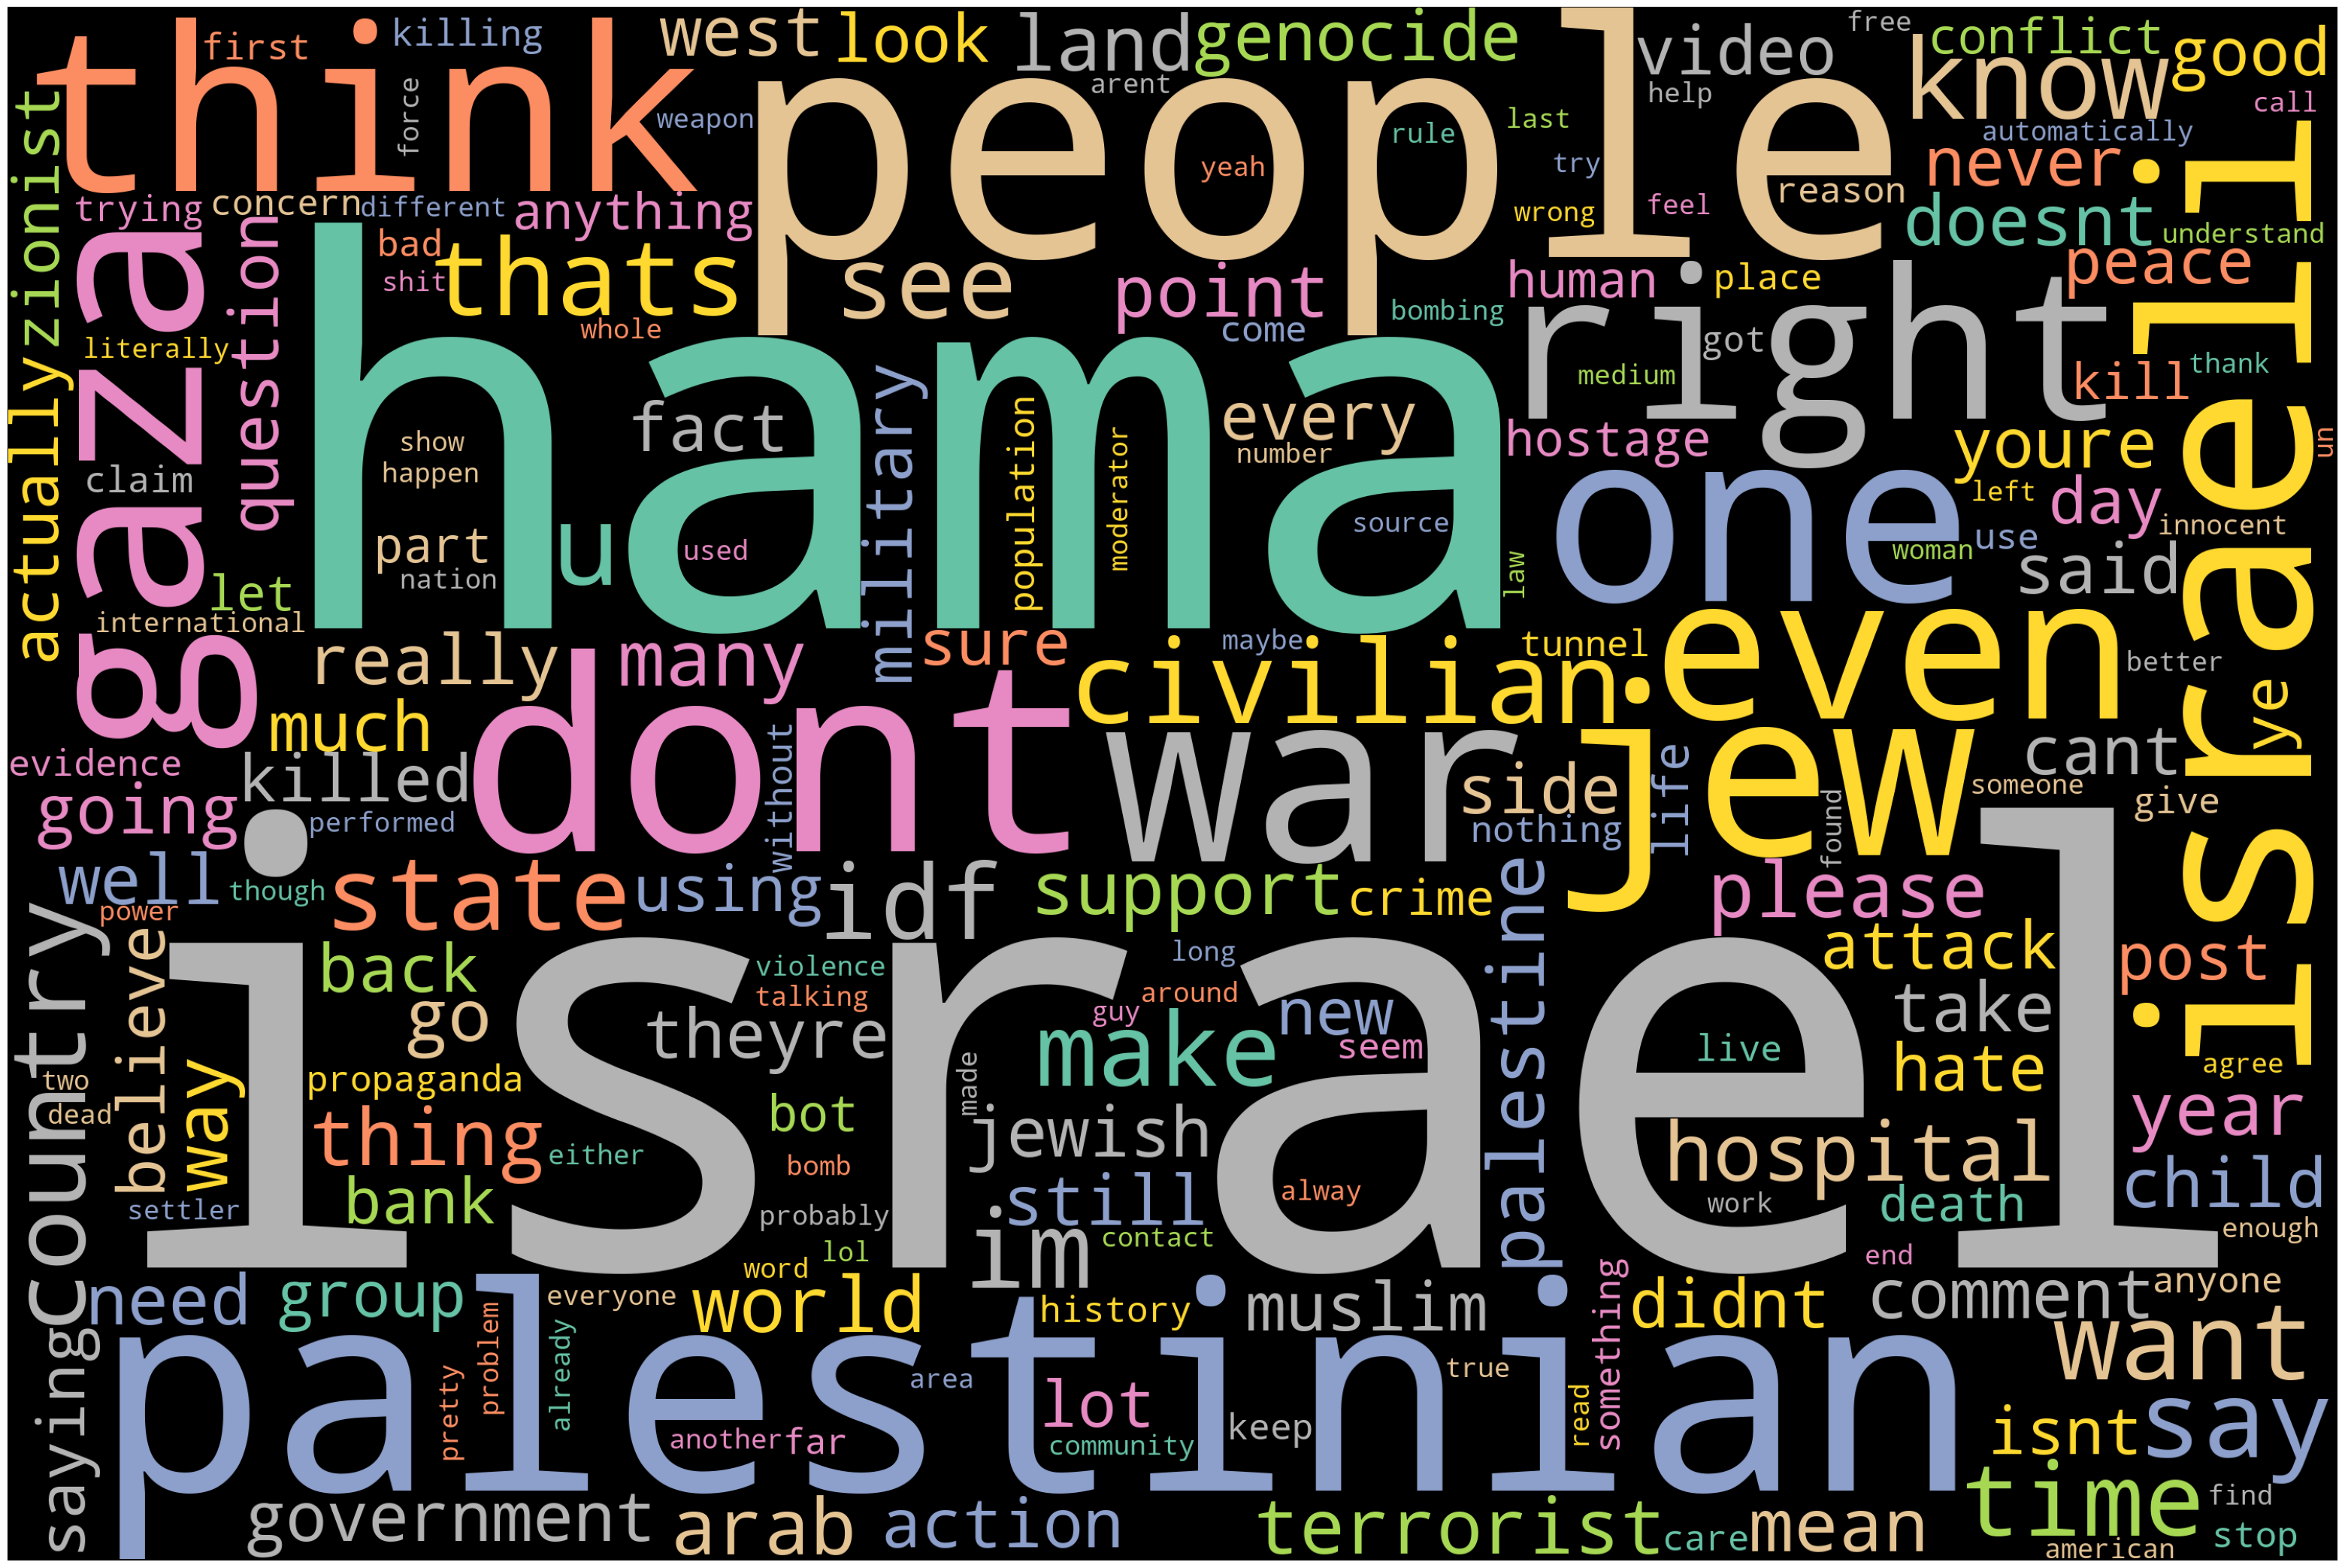

In [26]:
# WordCloud of All Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df.clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

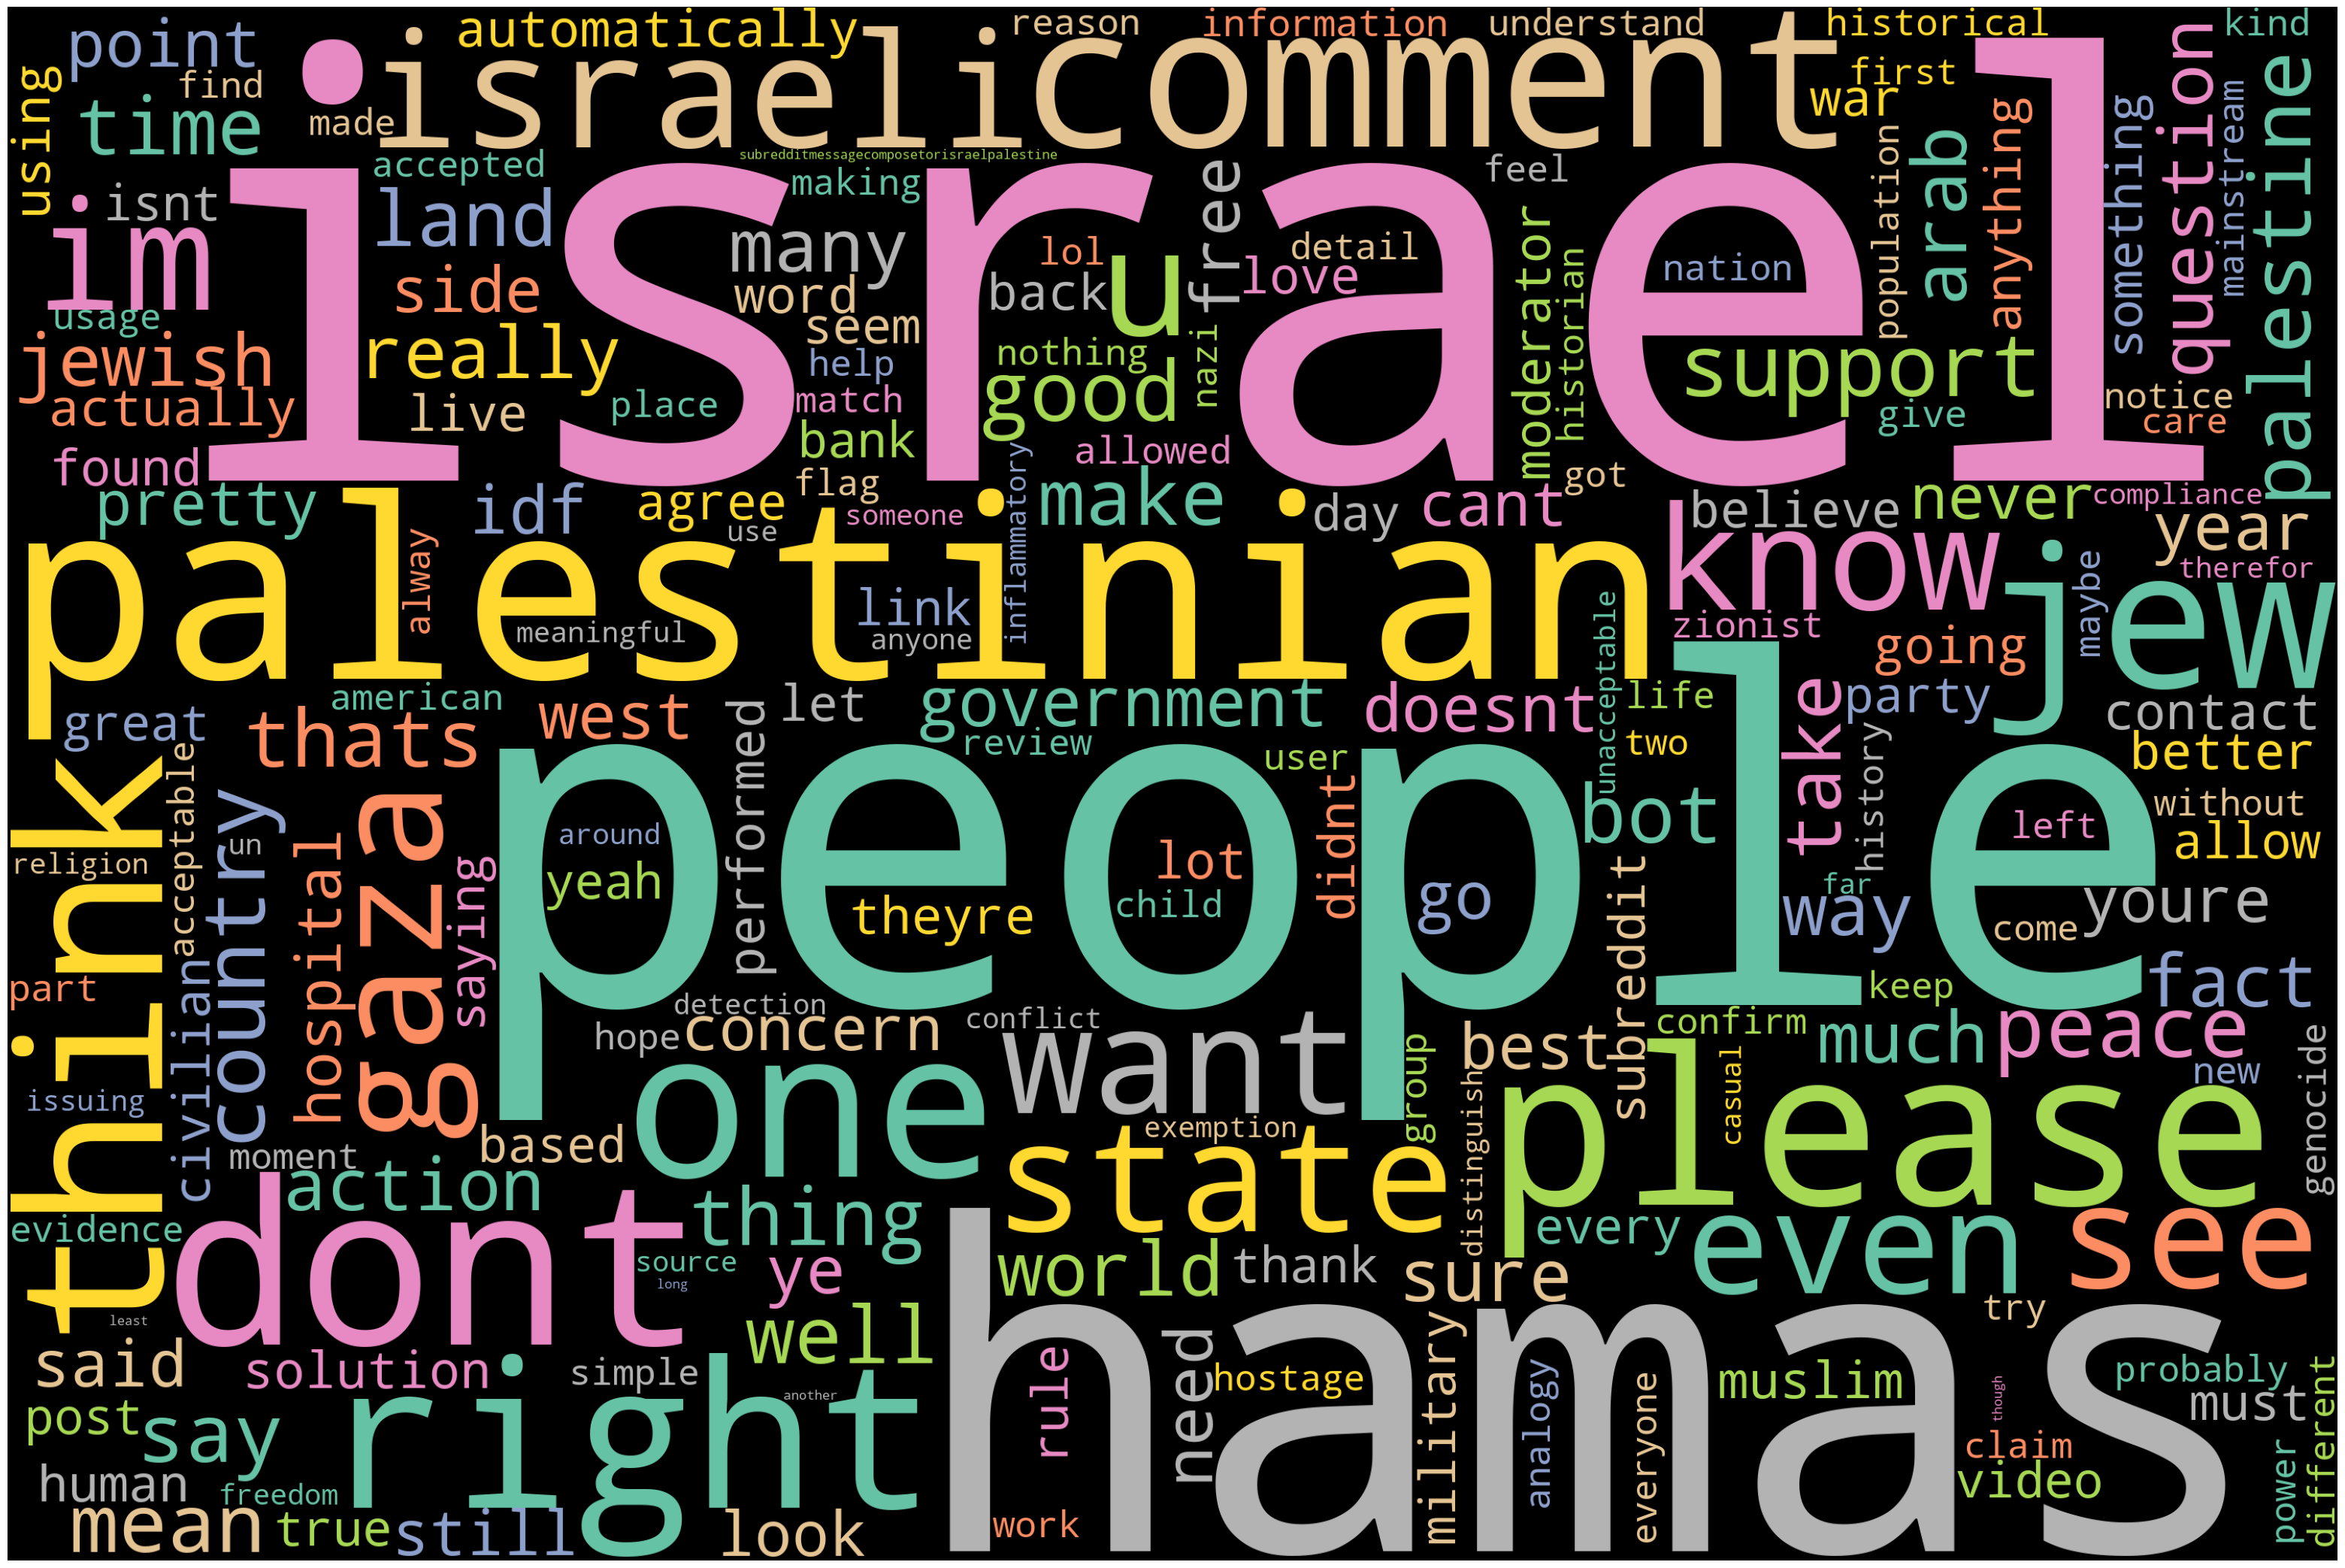

In [27]:
# WordCloud of Positive Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Positive'].clean_text)
                                          
# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

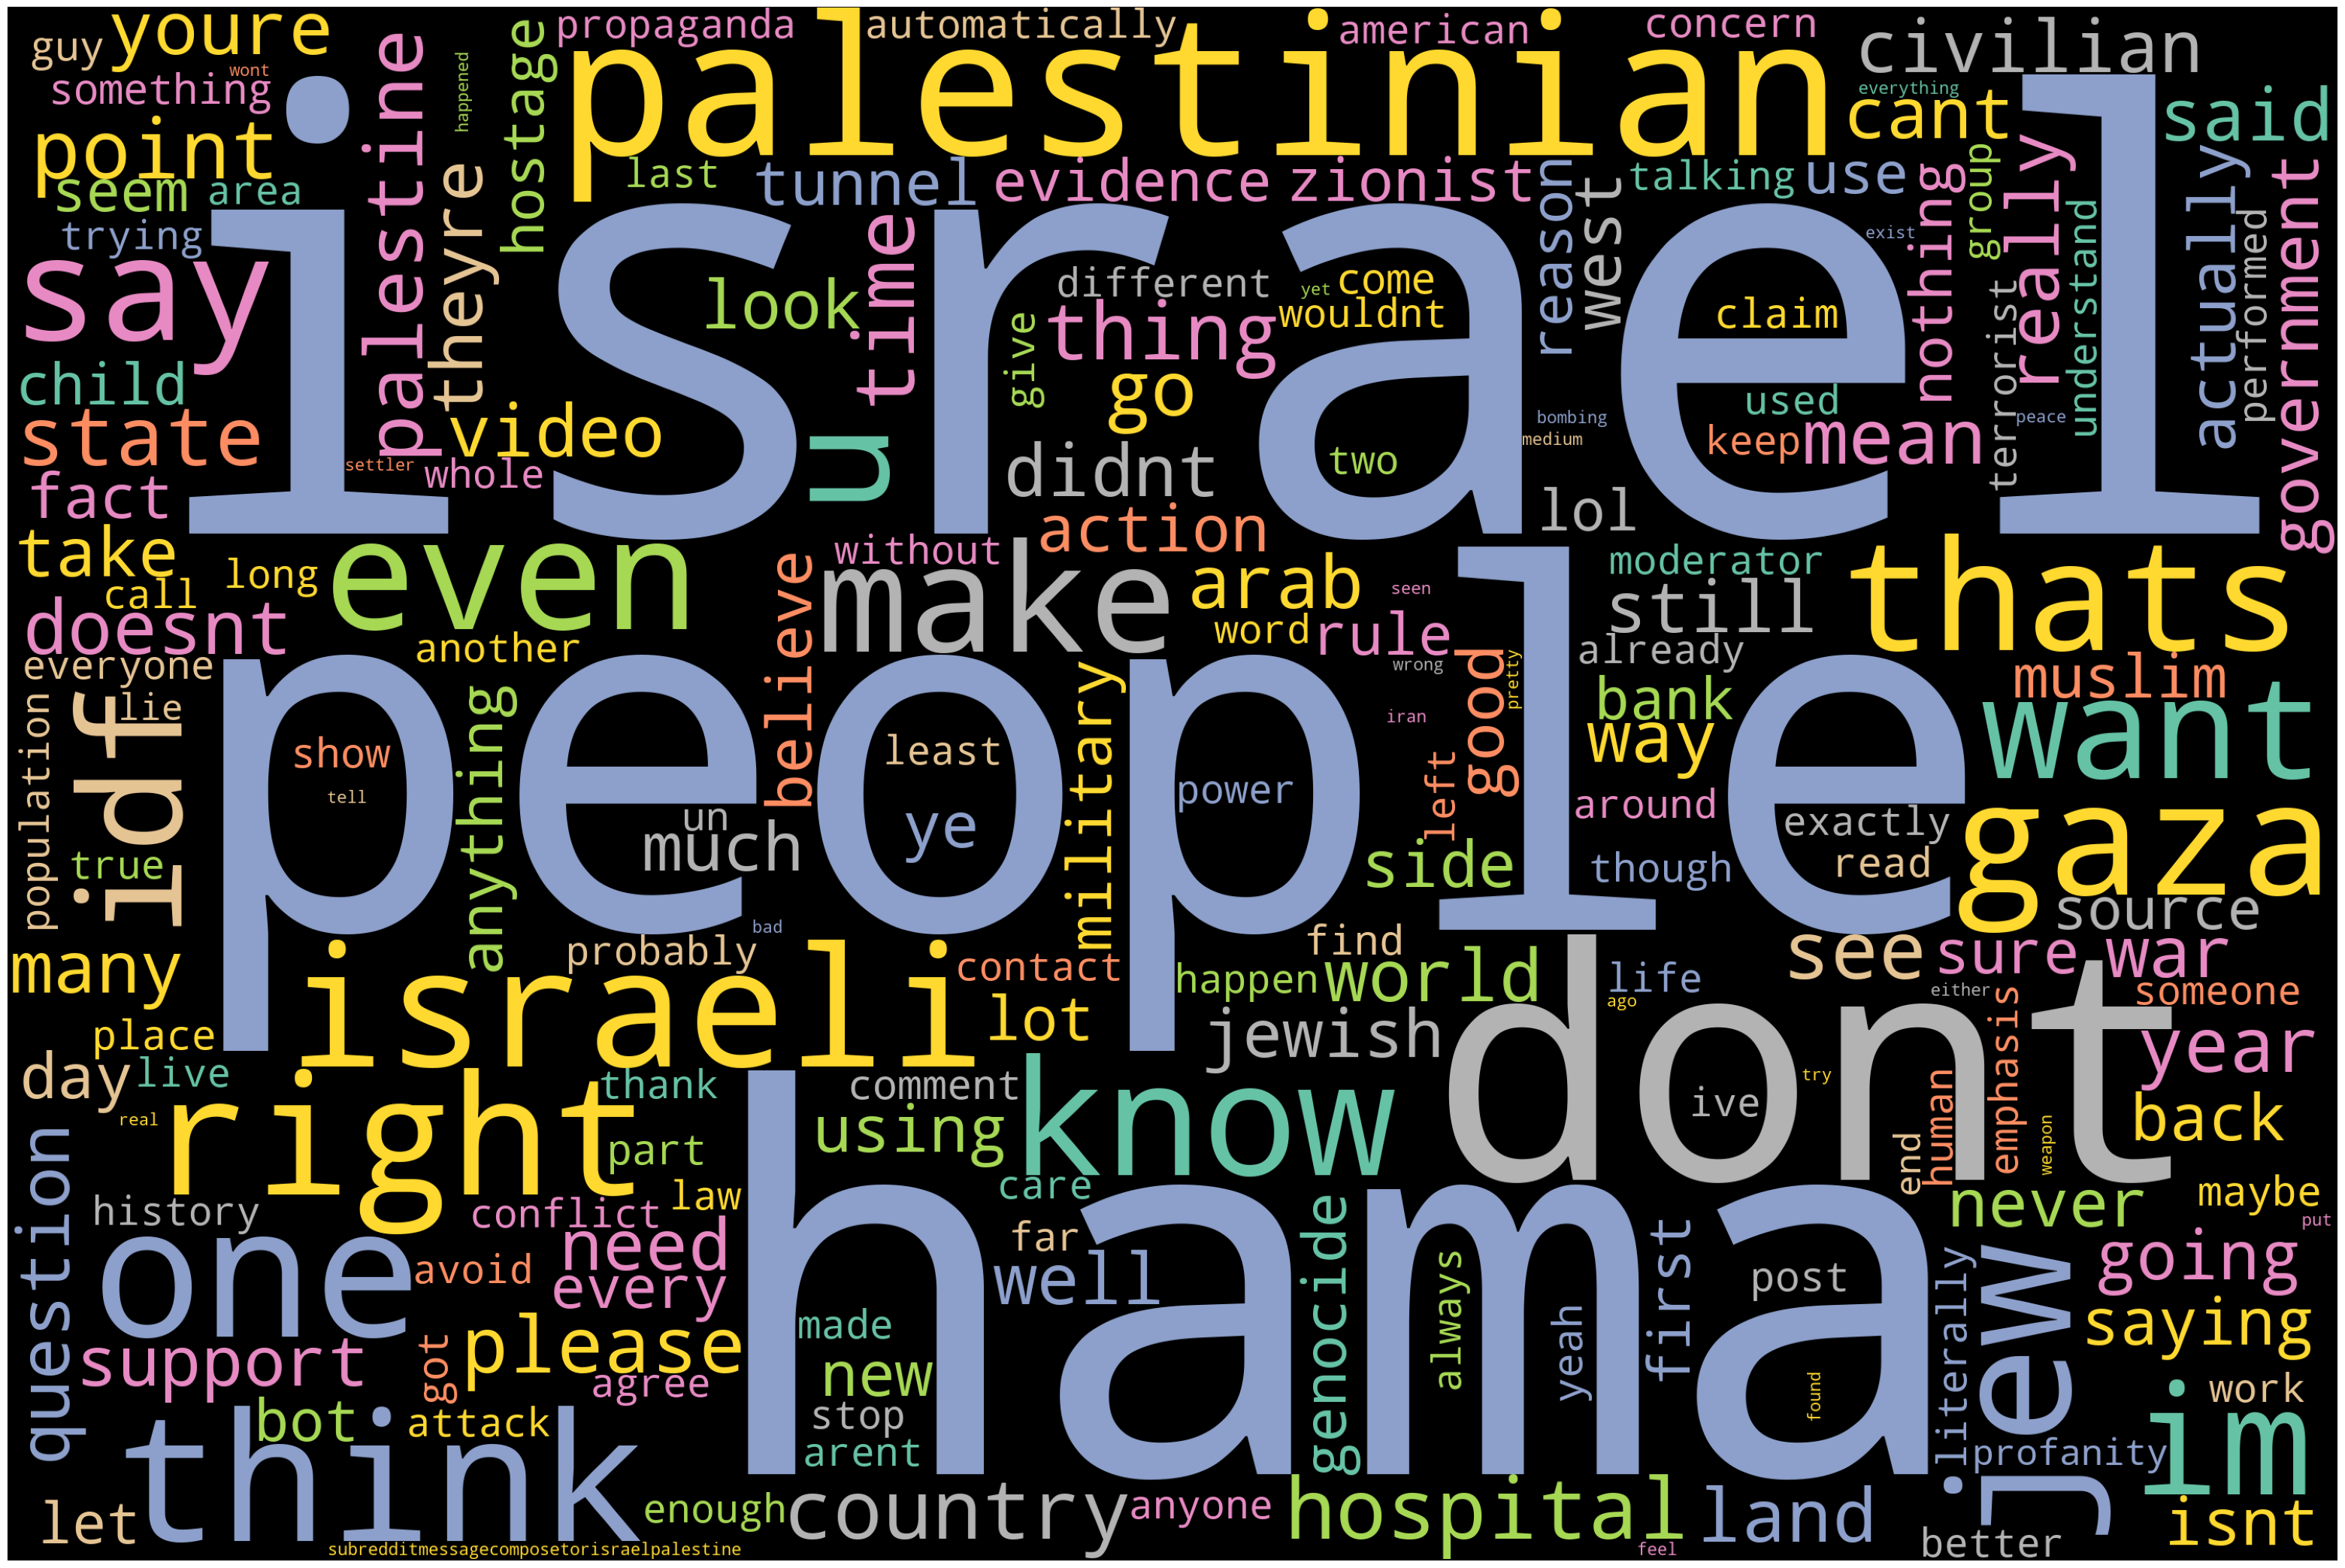

In [28]:
# WordCloud of Neutral Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Neutral'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

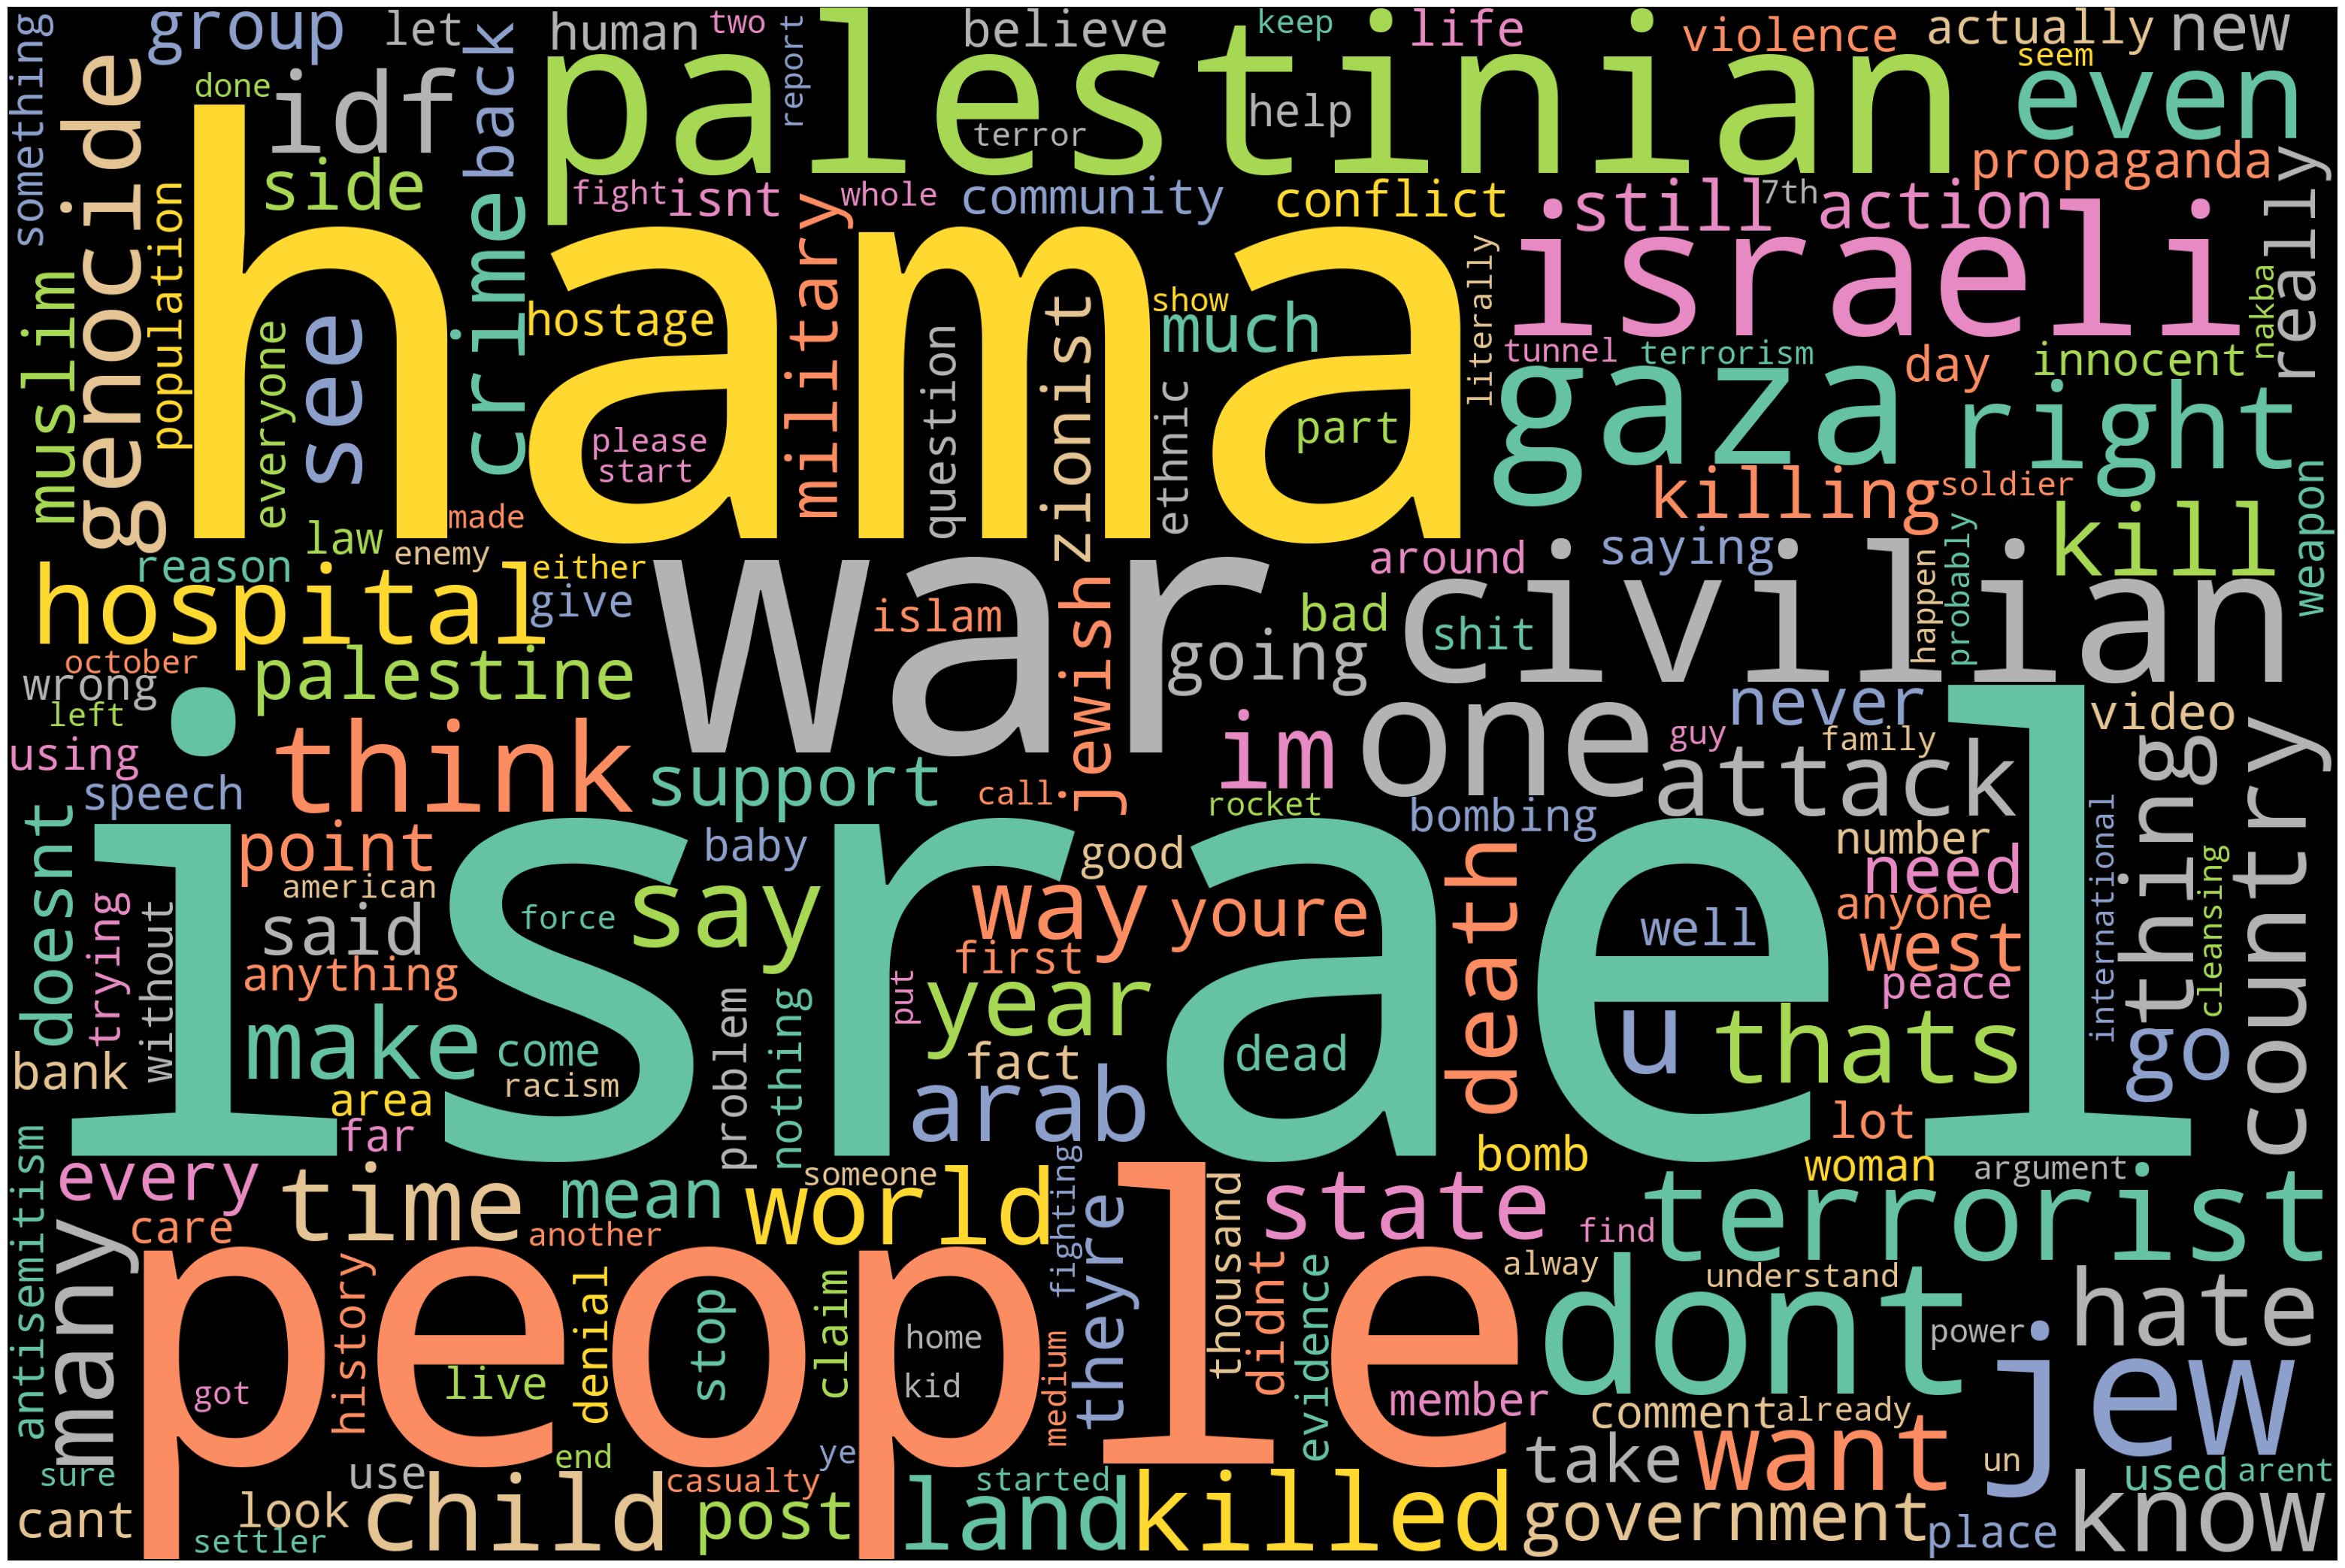

In [29]:
# WordCloud of Negative Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Negative'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   comment_id    50000 non-null  object 
 1   score         50000 non-null  int64  
 2   self_text     50000 non-null  object 
 3   subreddit     50000 non-null  object 
 4   created_time  50000 non-null  object 
 5   clean_text    50000 non-null  object 
 6   Compound      50000 non-null  float64
 7   Positive      50000 non-null  float64
 8   Negative      50000 non-null  float64
 9   Neutral       50000 non-null  float64
 10  Category      50000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.2+ MB


In [31]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  Category  
0     0.000    0.737   Neutral  
1     0.219    0.781   Neutral  
2     0.570    0.300  Negative  
3     0.000    0.531  Positive  
4     0.000    1.000   Neutral

### 4. POSITIVE NEGATIVE BIAS DETECTION

In [32]:
# Calculate the average sentiment scores for each subreddit
subreddit_sentiment = df.groupby('subreddit')[['Positive', 'Negative']].mean()

# Calculate the difference between positive and negative sentiment scores
subreddit_sentiment['Bias'] = subreddit_sentiment['Positive'] - subreddit_sentiment['Negative']

# Determine the direction of bias: Positive, Negative, or Neutral
def determine_bias_direction(bias):
   if bias > 0.01:  # You can adjust this threshold based on your dataset
      return 'Positive'
   elif bias < -0.01:  # You can adjust this threshold based on your dataset
      return 'Negative'
   else:
      return 'Neutral'

subreddit_sentiment['Bias Direction'] = subreddit_sentiment['Bias'].apply(determine_bias_direction)

# Sort subreddits based on bias in descending order
most_biased_subreddits = subreddit_sentiment.sort_values(by='Bias', ascending=False)

# Print or view the most biased subreddits with bias direction
print(most_biased_subreddits)

                       Positive  Negative      Bias Bias Direction
subreddit                                                         
AbruptChaos            0.188591  0.086455  0.102136       Positive
NoahGetTheBoat         0.240545  0.168091  0.072455       Positive
NonCredibleDefense     0.158685  0.125482  0.033204       Positive
worldnewsvideo         0.184823  0.181994  0.002830        Neutral
AskMiddleEast          0.160496  0.158665  0.001832        Neutral
CombatFootage          0.165491  0.177802 -0.012311       Negative
TerrifyingAsFuck       0.063000  0.075800 -0.012800       Negative
worldnews              0.160252  0.178821 -0.018569       Negative
PublicFreakout         0.170362  0.189455 -0.019094       Negative
Palestine              0.168652  0.190963 -0.022311       Negative
IsraelPalestine        0.164926  0.187304 -0.022378       Negative
ActualPublicFreakouts  0.136215  0.180727 -0.044512       Negative
IsrealPalestineWar_23  0.163174  0.221826 -0.058652       Nega

### 5. Topic Modelling

In [33]:
# Step 3: Topic Modeling
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1)  # Assuming 5 topics
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

In [34]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
n_top_words = 10  # You can adjust this number to display more or fewer words per topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
   top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
   top_words = [feature_names[i] for i in top_words_idx]
   top_words_per_topic.append(top_words)

# Print the topics and associated words
for topic_idx, top_words in enumerate(top_words_per_topic):
   print(f"Topic #{topic_idx + 1}:")
   print(", ".join(top_words))
   print()

Topic #1:
hamas, civilian, israel, child, people, hostage, terrorist, killed, war, dont

Topic #2:
post, thanks, genocide, hate, comment, speech, zionist, na, denial, link

Topic #3:
israel, palestinian, people, jew, state, country, hamas, right, dont, israeli

Topic #4:
hospital, hamas, idf, like, video, tunnel, dont, know, im, evidence

Topic #5:
lol, fuck, point, palestine, make, bot, question, avoid, rule, fucking



In [63]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']
print(israel_word_index)
print(palestine_word_index)

2488
3211


In [64]:
topic_term_distribution = lda_model.components_
print(topic_term_distribution.shape)

(5, 5000)


In [65]:
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

In [66]:
print(israel_topic_index)
print(palestine_topic_index)

2
2


In [48]:
# # Extract topic indices from the words associated with 'israel' and 'palestine'
# israel_topic_index = [topic_word[0] for topic_word in israel_topic_words]
# palestine_topic_index = [topic_word[0] for topic_word in palestine_topic_words]

NameError: name 'israel_topic_words' is not defined

## Geopolitical Stance Determination Using Dominant Topics and Sentiment Scores

In [52]:
# Define the function to determine geopolitical stance
def determine_geopolitical_stance(row):
   sentiment_score = row['Compound']
   topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]
   
   # Determine stance based on sentiment score and dominant topic
   if sentiment_score <= -0.5:
      return 'Against Israel/Palestine'
   elif sentiment_score >= 0.5 and topic_distribution.argmax() == palestine_topic_index:
      return 'Supports Palestine'
   elif sentiment_score >= 0.5 and topic_distribution.argmax() == israel_topic_index:
      return 'Supports Israel'
   else:
      return 'Neutral/Stance Not Clear'

# Apply the function to the DataFrame to determine geopolitical stances
df['geopolitical_stance'] = df.apply(determine_geopolitical_stance, axis=1)

# output data is gopolitical_stance.csv (sudah ada)

In [62]:
topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]
print(topic_distribution)
print(topic_distribution.argmax())
print(palestine_topic_index)
print(israel_topic_index)

[0.04321161 0.0429445  0.04333668 0.82643989 0.04406732]
3
2
2


In [46]:
stance_counts = df['geopolitical_stance'].value_counts()
print("Geopolitical Stance Distribution:")
print(stance_counts)

Geopolitical Stance Distribution:
Neutral/Stance Not Clear    30047
Against Israel/Palestine    14281
Supports Israel              5672
Name: geopolitical_stance, dtype: int64


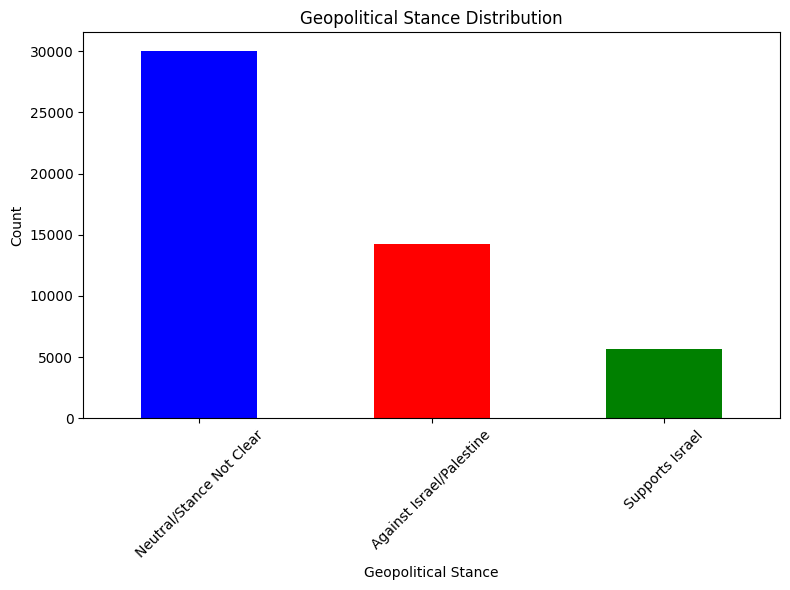

In [47]:
# Assuming 'geopolitical_stance' is a column in your DataFrame df
stance_counts = df['geopolitical_stance'].value_counts()

# Create bar chart using DataFrame values
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color=['blue', 'red', 'green', 'yellow'])
plt.xlabel('Geopolitical Stance')
plt.ylabel('Count')
plt.title('Geopolitical Stance Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the chart
plt.show()